In [1]:
import re  # in-built python module for Regular Expressions

# Pre processing text data

string = open('/media/sarang/5854309554307838/MSComputerScience/Thesis Work/NLP/Reading Comprehension/Dataset for Classification/Computer Science/scripts/fasttextClassification/fasttext/practiceData01.txt').read()  # Opening raw whatsapp text file
new_str = re.sub('[^a-zA-Z\n\.]', ' ', string)   #Removing all numbers and special characters
open('clos_clean.txt', 'w').write(new_str) # writing to new f

82516

In [5]:
import numpy as np
# Declaring two empty lists. One for words and one for their corresponding vector representation

words = []
vecs = []

# Getting word and corresponding vector from each line of the model.vec file generated by fasttext 

import codecs # To open the file in specific mode

with codecs.open('model01.vec', 'r', 'utf-8') as f_in:
    vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in f_in])
    
# Populating the two lists. Need to convert vector values from string to numpy array 

for i in range(10,len(vocabulary)): # Usually skip first 10 words becuase they might be garbage values.
    words.append(vocabulary[i])
    x = wv[i]
    vecs.append(np.fromstring(x,dtype='float32',sep=' '))   
    # np.fromstring takes string values and converts to float32 with space as a separator

In [6]:
import numpy as np

# Carrying out Singular Value Decomposition

U, s, Vh = np.linalg.svd(vecs,full_matrices=False) 

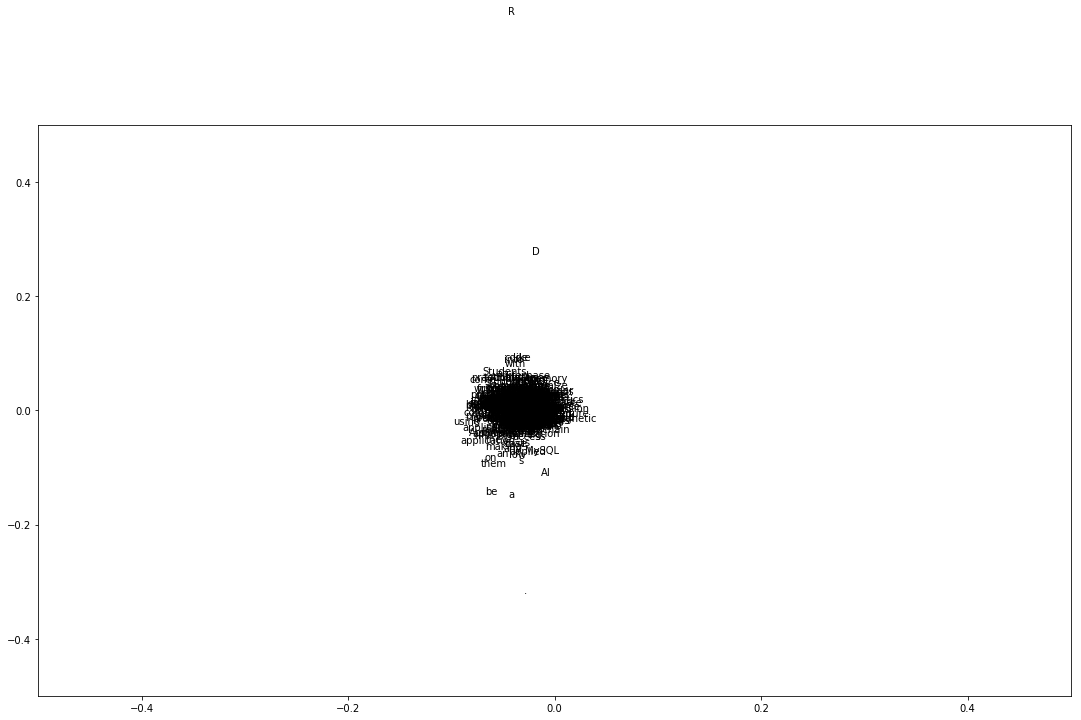

In [7]:
import matplotlib.pyplot as plt

# Plotting words and their vector representations

for i in range(len(words)):
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.text(U[i,0], U[i,1], words[i])
        plt.xlim((-0.5,0.5))
        plt.ylim((-0.5,0.5))
        
plt.savefig('viz.jpg')